In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
# Memuat DATASET dan meliat 5 baris pertama
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Meliat informasii dari Dataset
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


(768, 9)

In [4]:
# Analysis Deskriptif
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
# Cek missing values
print("\nMissing Values per fitur: ")
print(df.isnull().sum())


Missing Values per fitur: 
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


## EDA

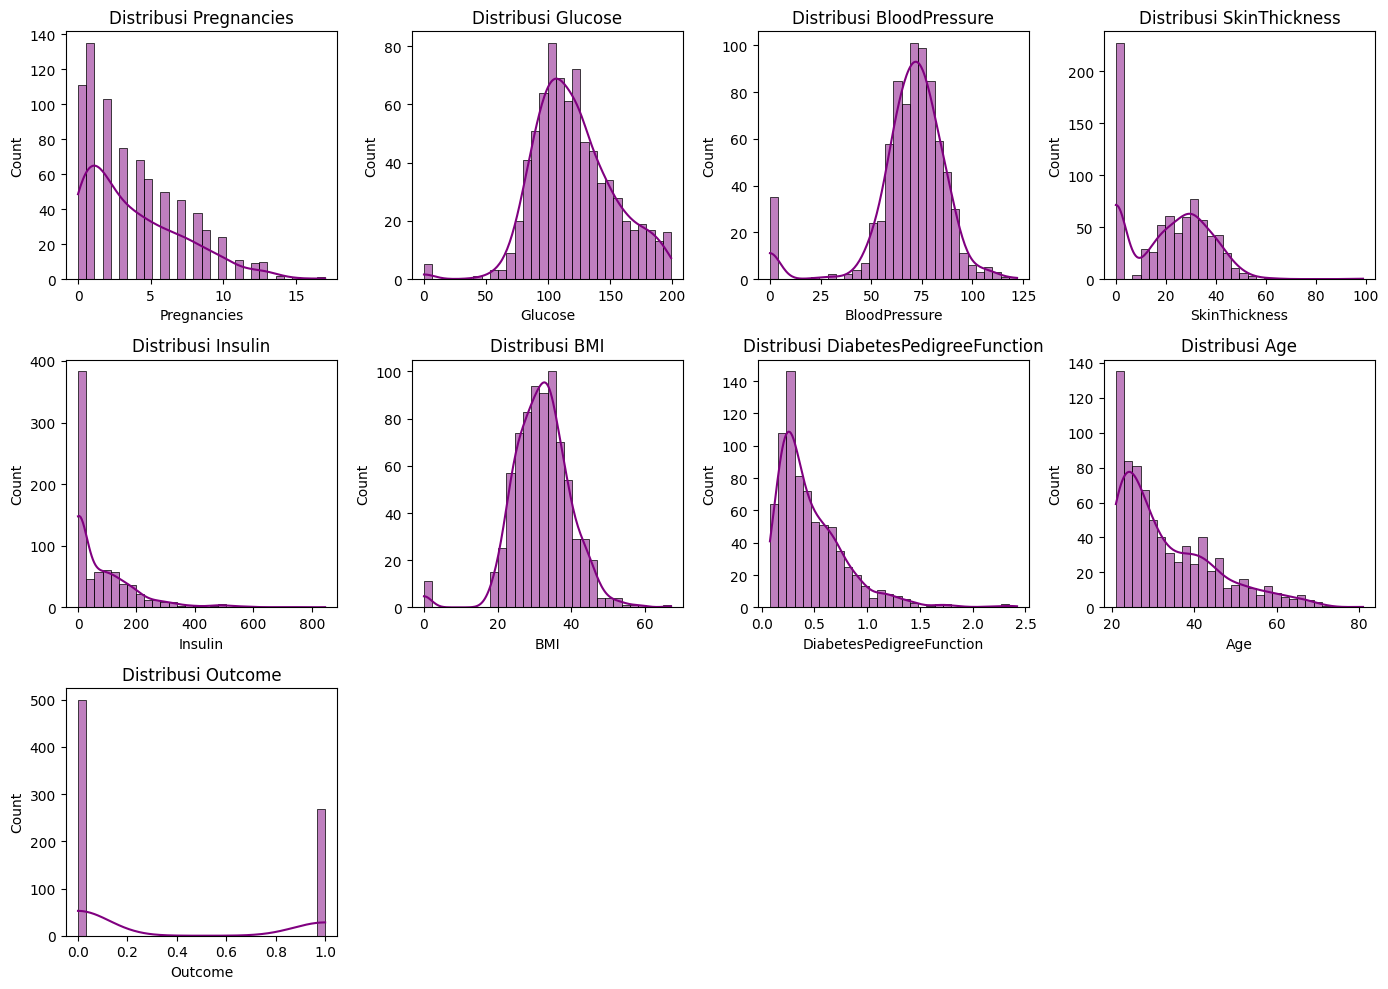

In [6]:
# Ditribusi fitur numerik
num_features = df.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[column], bins=30, kde=True, color='purple')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

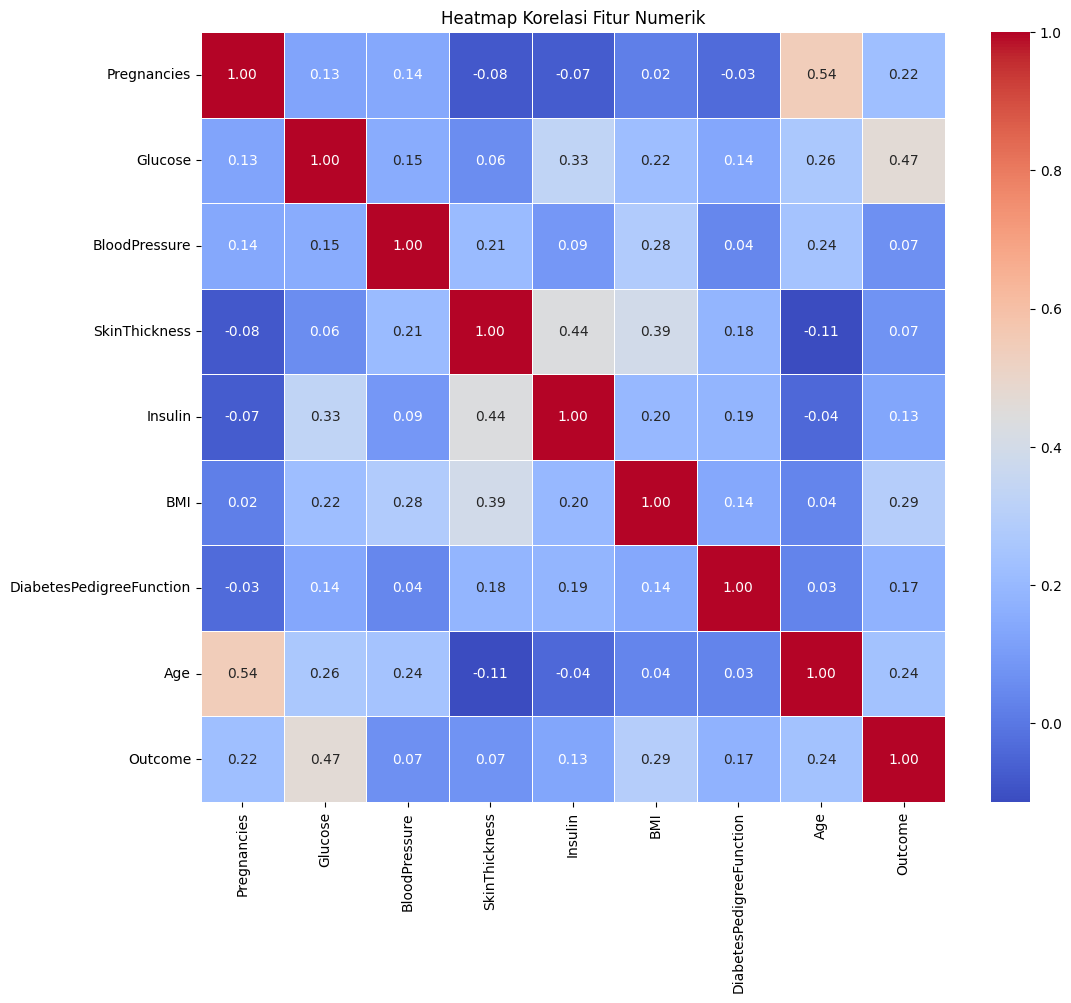

In [7]:
# Heatmap korelasi untuk fitur numerik
plt.figure(figsize=(12, 10))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi Fitur Numerik')
plt.show()

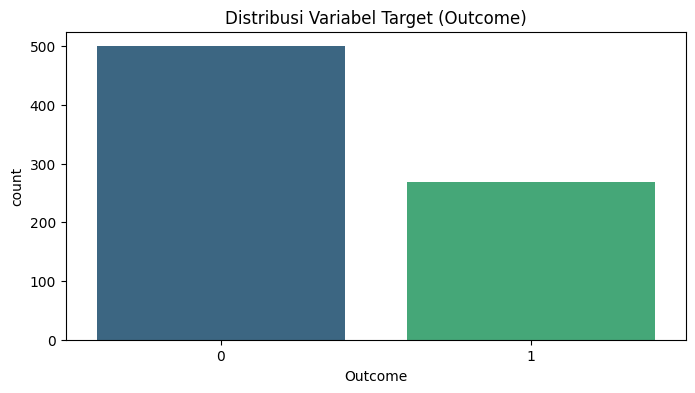

In [8]:
# Visualisasi distribusi variabel target
plt.figure(figsize=(8, 4))
sns.countplot(x='Outcome', data=df, palette='viridis')
plt.title('Distribusi Variabel Target (Outcome)')
plt.show()

## Data Splitting and Standardisasi

In [9]:
# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=['Outcome'])
y = df['Outcome']


# Standardisasi fitur numerik
from sklearn.preprocessing import StandardScaler
# Pili fitur numerik
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# Split data menjadi set pelatihan dan set uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,-0.547919,-1.154694,-3.572597,-1.288212,-0.692891,-4.060474,-0.507006,-1.041549
618,1.530847,-0.278373,0.666618,0.217261,-0.692891,-0.481351,2.446670,1.425995
346,-0.844885,0.566649,-1.194501,-0.096379,0.027790,-0.417892,0.550035,-0.956462
294,-1.141852,1.255187,-0.987710,-1.288212,-0.692891,-1.280942,-0.658012,2.702312
231,0.639947,0.410164,0.563223,1.032726,2.519781,1.803195,-0.706334,1.085644
...,...,...,...,...,...,...,...,...
71,0.342981,0.566649,-0.263941,0.907270,0.522715,-0.430583,-0.183854,-0.616111
106,-0.844885,-0.779128,2.734528,-1.288212,-0.692891,-1.217483,-0.799958,-0.531023
270,1.827813,-0.622642,0.873409,1.032726,-0.692891,1.727044,2.005732,0.404942
435,-1.141852,0.629244,-3.572597,-1.288212,-0.692891,1.320902,-0.805998,-0.360847


In [11]:
y_train

,Outcome
60,0
618,1
346,0
294,0
231,1
...,...
71,0
106,0
270,1
435,1


In [12]:
X_train.shape

(614, 8)

In [13]:
y_test.shape

(154,)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
# Persiapan semua model tanpa Tuning
knn = KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='auto', p=2, metric='euclidean').fit(X_train, y_train)
nb = GaussianNB(priors=None, var_smoothing=1e-9).fit(X_train, y_train)
svm = SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, probability=False, max_iter=-1).fit(X_train, y_train)
dt = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, max_features=None, splitter='best',random_state=None).fit(X_train, y_train)
rf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', random_state=None, bootstrap=True).fit(X_train, y_train)
mlp = MLPClassifier(hidden_layer_sizes=100, activation='relu', solver='adam', learning_rate='constant').fit(X_train, y_train)
sgd = SGDClassifier(loss='hinge', max_iter=100, alpha=0.0001, learning_rate='optimal').fit(X_train, y_train)
abc = AdaBoostClassifier(estimator=None, n_estimators=50, learning_rate=1.0, algorithm='deprecated', random_state=None).fit(X_train, y_train)
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=None).fit(X_train, y_train)
xgb = XGBClassifier(n_estimators= 100, learning_rate=0.3, max_depth=6, subsample=1.0).fit(X_train, y_train)


In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Fungsi untuk mengevaluasi dan mengembalikan hasil sebagai kamus
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    results = {
        'Confusion Matrix': cm,
        'True Positive (TP)': tp,
        'False Positive (FN)': fn,
        'False Negative (FP)': fp,
        'True Negative (TN)': tn,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }
    return results

# Mengevaluasi setiap model dan mengumpulkan hasilny
results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn,X_test, y_test),
    'Decision Tree': evaluate_model(dt, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
    'Support Vector Machine (SVM)':evaluate_model(svm,X_test, y_test),
    'Naive Bayes': evaluate_model(nb, X_test, y_test),
    'Multilayer Perceptron (MLP)': evaluate_model(mlp, X_test, y_test),
    'Stochastic Gradient Descent (SGD)': evaluate_model(sgd, X_test, y_test),
    'AdaBoost': evaluate_model(abc, X_test, y_test),
    'Gradient Boosting': evaluate_model(gbc, X_test, y_test),
    'XGBoost': evaluate_model(xgb, X_test, y_test)
}

# Buat DataFrame dengan hasil
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

# Konversi daftar kamus ke DataFrame
summary_df = pd.DataFrame(rows)

# Tampilkan DataFrame
print(summary_df)

                               Model  Accuracy  Precision    Recall  F1-Score
0          K-Nearest Neighbors (KNN)  0.668831   0.543478  0.454545  0.495050
1                      Decision Tree  0.746753   0.629032  0.709091  0.666667
2                 Random Forest (RF)  0.759740   0.660714  0.672727  0.666667
3       Support Vector Machine (SVM)  0.727273   0.632653  0.563636  0.596154
4                        Naive Bayes  0.766234   0.661017  0.709091  0.684211
5        Multilayer Perceptron (MLP)  0.759740   0.673077  0.636364  0.654206
6  Stochastic Gradient Descent (SGD)  0.727273   0.627451  0.581818  0.603774
7                           AdaBoost  0.779221   0.677966  0.727273  0.701754
8                  Gradient Boosting  0.746753   0.637931  0.672727  0.654867
9                            XGBoost  0.707792   0.580645  0.654545  0.615385


In [16]:
# Membuat fungsi untuk menampilkan Confusion Matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(2, 2))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {model_name}', fontsize=8)
    plt.ylabel('Actual', fontsize=8)
    plt.xlabel('Predicted', fontsize=8)
    plt.show()

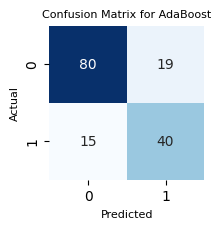

In [17]:
# Tampilkan Confusion Matrix untuk AdaBoost
abc_cm = results['AdaBoost']['Confusion Matrix']
plot_confusion_matrix(abc_cm, 'AdaBoost')

- True Positive (TP) = 80: Model berhasil mengidentifikasi 80 pasien yang benar-benar Diabetes.

- False Positive (FP) = 15: Model salah mengidentifikasi 15 pasien yang sebenarnya tidak Diabetes sebagai Diabetes.

- True Negative (TN) = 40: Model benar mengidentifikasi pasien yang tidak Diabetes.

- False Negative (FN) = 19: Model gagal mengidentifikasi 19 pasien yang sebenarnya Diabetes.

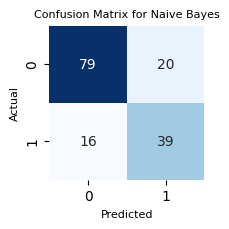

In [18]:
# Tampilkan Confusion Matrix untuk Naive Bayes
nb_cm = results['Naive Bayes']['Confusion Matrix']
plot_confusion_matrix(nb_cm, 'Naive Bayes')

- True Positive (TP) = 79: Model berhasil mengidentifikasi 80 pasien yang benar-benar Diabetes.

- False Positive (FP) = 16: Model salah mengidentifikasi 16 pasien yang sebenarnya tidak Diabetes sebagai Diabetes.

- True Negative (TN) = 39: Model benar mengidentifikasi pasien yang tidak Diabetes.

- False Negative (FN) = 20: Model gagal mengidentifikasi 20 pasien yang sebenarnya Diabetes.

In [ ]:
import pickle

# Save the AdaBoost model to a pickle file
with open('adaboost_model.pkl', 'wb') as f:
    pickle.dump(abc, f)

print("AdaBoost model saved to adaboost_model.pkl")